In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import load
import scipy
import matplotlib.pyplot as plt
from scipy.special import legendre
from numpy.linalg import svd

from time import time



In [2]:
from joblib import Parallel, delayed

In [3]:
sum=np.zeros((5000,5000))
x = np.linspace(-1,1,5000)
# modefify x to 2d array
x = x[:,np.newaxis]
sum,x

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[-1.        ],
        [-0.99959992],
        [-0.99919984],
        ...,
        [ 0.99919984],
        [ 0.99959992],
        [ 1.        ]]))

In [4]:
np.linalg.norm(x,'fro')

40.83299482885549

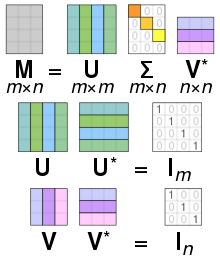

In [5]:
legendre(2)([1,2,3])

array([ 1. ,  5.5, 13. ])

In [6]:
np.outer([4,5,6],legendre(2)([1,2,3]))

array([[ 4. , 22. , 52. ],
       [ 5. , 27.5, 65. ],
       [ 6. , 33. , 78. ]])

In [7]:
#DEF FUNCTION INPUT SHOULD BE ONLY INT GIVE SQUARE

def superposition(data: np.ndarray):# it will create 
    scale=StandardScaler()
    
    scaled = scale.fit_transform(data  )
    sum=np.zeros((5000,5000))
    x = np.linspace(-1,1,5000)
    for i in range(data.shape[1]):
        sum=sum+np.outer(data[:,i],#data is in shaPE OF 5000xDATA.shape[1] AN SHAPE[1] MEANS THE NUMBER OF COLUMNS
                         legendre(i+1)(x)#legendre polinomial of order i+1 apllied to x p_n applies to matrix x
                         )#outer product of the i-th column of the data matrix and the i-th legendre polynomial
        
    
    return sum

def singularvaluedecomposition(data):
    data_sup = superposition(data)
    a, data_svd, b = svd(data_sup)

    return data_svd

def normalize_matrix(matrix):
    matrix_norm = np.linalg.norm(matrix, 'fro')#frobenius norm is the square root of the sum of the absolute squares of its elements
                                                # works for 2d arrays
    if np.isnan(matrix_norm):# is NAN not a number 
        #it will return a matrix of zeros of the same shape as the input matrix
        return np.zeros_like(matrix)
    else:
        normalized_matrix = matrix / matrix_norm
        return normalized_matrix
    
def coarse_grain(data,f):
    img = superposition(data)#superposition of the data

    s1=np.zeros((int(img.shape[0]/f)#shape[0] is the number of rows
                 ,int(img.shape[1]/f))#shape[1] is the number of columns
                 ) # Coarse grained image'

    for i in range(s1.shape[0]):
        for j in range(s1.shape[1]):
            s1[i,j]=np.mean(img[i*f:i*f+f,j*f:j*f+f]) 

    return s1

In [8]:
import os
os.getcwd()
# go one directory back
os.chdir("..")
os.getcwd()

'/home/karansingh/Documents/summer-term/KARAN_ECG'

In [9]:
data = load('data_prep/disease_SR_random.npy')
cc = coarse_grain(data[0],50)


In [10]:
###### back
data.shape,cc.shape,data[0].shape

((5000, 5000, 12), (100, 100), (5000, 12))

In [11]:
np.savetxt('junk.txt',cc)

In [12]:
############################################################
    
#### SR_data

data = load('data_prep/disease_SR_random.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

        

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())

    np.savetxt('disease_SR_svd' + '_'+str(i) + '.txt',cc)


166.8276011943817
165.2117419242859
165.487300157547
164.90554475784302
162.18966555595398
162.0149085521698
162.34888863563538
162.1267523765564
161.98145294189453
162.34905529022217


In [13]:
############################################################
    
#### SB data
    
data = load('data_prep/disease_SB_random.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix

    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)
    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_SB_svd' + '_'+str(i) + '.txt',cc)



164.19348549842834
164.998272895813
163.7981357574463
162.11219215393066
162.18179750442505
162.71906399726868
162.61480617523193
162.41529607772827
162.1506667137146
162.03329586982727


In [14]:
############################################################
    
#### ST data
    
data = load('data_prep/disease_ST_random.npy')

split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)




for i in range(split_number):
    cc = data_split[i]

    norm_matrix = []
    for j in range(len(cc)):
        norm_matrix.append(normalize_matrix(cc[j]))

    cc = norm_matrix
    
    start = time()
    results = Parallel(n_jobs = 10)(delayed(coarse_grain)(x,50) for x in cc)
    end = time()

    print(end- start)

    results = np.array(results)
    cc = []
    for j in range(results.shape[0]):
        cc.append(results[j].ravel())
    np.savetxt('disease_ST_svd' + '_'+str(i) + '.txt',cc)

164.06529355049133
164.80181407928467
166.62160086631775
167.945170879364
167.5277419090271
167.81350469589233
166.7825539112091
165.3011507987976
163.4963254928589
163.39806008338928
